# 实验1：已知一个整数序列的通项公式，生成若干长度为5的序列作为训练集，训练lstm网络，对给定的序列预测下一项的值

In [13]:
import numpy as np
import torch
from torch.utils.data import TensorDataset,DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
def get_seq(start,n):
  x=[5*i+3 for i in range(start,start+n)]
  return x

In [3]:
data=[]
N=500
seq_len=5

for i in range(N):
  start=np.random.randint(0,25)
  data.append(get_seq(start,seq_len))

data=np.array(data)
data=torch.from_numpy(data)

In [4]:
data.shape,type(data)

(torch.Size([500, 5]), torch.Tensor)

In [5]:
data[0:10]

tensor([[ 58,  63,  68,  73,  78],
        [103, 108, 113, 118, 123],
        [118, 123, 128, 133, 138],
        [ 88,  93,  98, 103, 108],
        [ 13,  18,  23,  28,  33],
        [ 98, 103, 108, 113, 118],
        [ 48,  53,  58,  63,  68],
        [103, 108, 113, 118, 123],
        [ 48,  53,  58,  63,  68],
        [ 23,  28,  33,  38,  43]])

In [6]:
target=data[:,-1:].type(torch.FloatTensor)
data=data[:,:-1].type(torch.FloatTensor)

In [7]:
train_x=data[:450]
train_y=target[:450]
test_x=data[450:]
test_y=target[450:]

train_dataset=TensorDataset(train_x,train_y)
test_dataset=TensorDataset(test_x,test_y)
train_loader=DataLoader(train_dataset,batch_size=5,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=5,shuffle=True)

In [8]:
train_x[0],train_y[0]

(tensor([58., 63., 68., 73.]), tensor([78.]))

In [17]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.lstm=nn.LSTM(input_size=1,hidden_size=10,batch_first=True)#input[5,4,1]
    self.fc=nn.Linear(10,1)

  def forward(self,x,hidden):
    output,hidden=self.lstm(x,hidden)#output[5,4,10]
    output=output[:,-1,:]
    output=self.fc(output)
    return output

net=model()
loss_fn=nn.MSELoss()
opt=torch.optim.Adam(net.parameters(),lr=0.001)

In [18]:
print(net)

model(
  (lstm): LSTM(1, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)


In [19]:
epoch_nums=300
losses=[]

for epoch in range(epoch_nums):
  for i,data in enumerate(train_loader):
    x,y=data#x:[5,4],y:[5,1]
    x=x.view(5,-1,1)#[5,4,1]

    hidden=(torch.zeros(1,5,10),torch.zeros(1,5,10))
    pred=net(x,hidden)
    loss=loss_fn(pred,y)

    opt.zero_grad()
    loss.backward()
    opt.step()

  if epoch%10==0:
    print(epoch," : ",loss.data)
    losses.append(loss.data)

0  :  tensor(7937.6553)
10  :  tensor(5741.7607)
20  :  tensor(4897.0020)
30  :  tensor(5078.7080)
40  :  tensor(2370.8650)
50  :  tensor(4323.5254)
60  :  tensor(4775.3779)
70  :  tensor(2103.3184)
80  :  tensor(707.8944)
90  :  tensor(826.0210)
100  :  tensor(1158.4812)
110  :  tensor(0.4458)
120  :  tensor(663.5067)
130  :  tensor(278.1318)
140  :  tensor(272.7393)
150  :  tensor(83.8764)
160  :  tensor(407.8170)
170  :  tensor(0.2274)
180  :  tensor(5.0523)
190  :  tensor(40.8250)
200  :  tensor(0.2386)
210  :  tensor(0.1681)
220  :  tensor(0.0042)
230  :  tensor(1.7732)
240  :  tensor(0.0437)
250  :  tensor(0.1192)
260  :  tensor(2.6749)
270  :  tensor(1.1046)
280  :  tensor(0.0006)
290  :  tensor(0.6044)


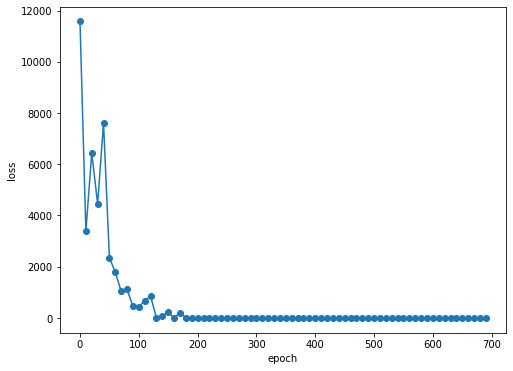

In [16]:
# 绘制训练loss曲线

step = len(losses)
losses_x = [10*i for i in range(step)]

plt.figure(figsize=(8,6))
plt.plot(losses_x, losses,"-o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [15]:
rights=0
length=0

for i,data in enumerate(test_loader):
  x,y=data#x:[5,4],y:[5,1]
  x=x.view(5,-1,1)#[5,4,1]

  hidden=(torch.zeros(1,5,10),torch.zeros(1,5,10))
  pred=net(x,hidden)

  print("pred: ",pred.view(1,-1).data)
  print("y: ",y.view(1,-1).data)

pred:  tensor([[103.0210,  97.9722,  57.9646,  62.9770,  47.9958]])
y:  tensor([[103.,  98.,  58.,  63.,  48.]])
pred:  tensor([[ 32.9861,  87.9939, 122.9927,  47.9958,  27.9630]])
y:  tensor([[ 33.,  88., 123.,  48.,  28.]])
pred:  tensor([[ 47.9958,  92.9738, 103.0210, 138.0857, 108.0751]])
y:  tensor([[ 48.,  93., 103., 138., 108.]])
pred:  tensor([[117.9765, 117.9765,  27.9630,  82.9921, 127.9801]])
y:  tensor([[118., 118.,  28.,  83., 128.]])
pred:  tensor([[117.9765, 138.0857,  27.9630,  37.9944, 142.9498]])
y:  tensor([[118., 138.,  28.,  38., 143.]])
pred:  tensor([[ 72.9790,  53.0048, 122.9927,  32.9861,  62.9770]])
y:  tensor([[ 73.,  53., 123.,  33.,  63.]])
pred:  tensor([[ 47.9958,  42.9345,  57.9646,  67.9861, 108.0751]])
y:  tensor([[ 48.,  43.,  58.,  68., 108.]])
pred:  tensor([[ 27.9630,  87.9939,  22.9870, 132.8280, 138.0857]])
y:  tensor([[ 28.,  88.,  23., 133., 138.]])
pred:  tensor([[37.9944, 72.9790, 42.9345, 82.9921, 22.9870]])
y:  tensor([[38., 73., 43., 83., 

# 正弦函数

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset,DataLoader
import torch.nn as nn
from matplotlib import pyplot as plt

In [ ]:
data=[]
start=0
for i in range(200):
  x=[np.sin(x/10) for x in range(start,start+11)]
  data.append(x)
  start=start+1

data=np.array(data)
data=torch.from_numpy(data)

target=data[:,-1:].type(torch.FloatTensor)
data=data[:,:-1].type(torch.FloatTensor)

train_x=data[:150]
train_y=target[:150]
test_x=data[150:]
test_y=target[150:]

train_dataset=TensorDataset(train_x,train_y)
test_dataset=TensorDataset(test_x,test_y)
train_loader=DataLoader(train_dataset,batch_size=5,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=5,shuffle=False)

In [ ]:
for i in range(5):
  print(train_x[i])
  print(train_y[i])

tensor([0.0000, 0.0998, 0.1987, 0.2955, 0.3894, 0.4794, 0.5646, 0.6442, 0.7174,
        0.7833])
tensor([0.8415])
tensor([0.0998, 0.1987, 0.2955, 0.3894, 0.4794, 0.5646, 0.6442, 0.7174, 0.7833,
        0.8415])
tensor([0.8912])
tensor([0.1987, 0.2955, 0.3894, 0.4794, 0.5646, 0.6442, 0.7174, 0.7833, 0.8415,
        0.8912])
tensor([0.9320])
tensor([0.2955, 0.3894, 0.4794, 0.5646, 0.6442, 0.7174, 0.7833, 0.8415, 0.8912,
        0.9320])
tensor([0.9636])
tensor([0.3894, 0.4794, 0.5646, 0.6442, 0.7174, 0.7833, 0.8415, 0.8912, 0.9320,
        0.9636])
tensor([0.9854])


In [ ]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    #self.rnn=nn.RNN(1,10,batch_first=True)
    #self.lstm=nn.LSTM(input_size=1,hidden_size=10,batch_first=True)
    self.gru=nn.GRU(1,10,batch_first=True)
    self.fc=nn.Linear(10,1)

  def forward(self,x,hidden):
    #output,hidden=self.rnn(x,hidden)
    #output,hidden=self.lstm(x,hidden)
    output,hidden=self.gru(x,hidden)
    output=output[:,-1,:]
    output=self.fc(output)
    return output

net=model()
loss_fn=nn.MSELoss()
opt=torch.optim.Adam(net.parameters(),lr=0.001)
print(net)

model(
  (gru): GRU(1, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
epoch_nums=100
losses=[]
h0=torch.zeros(1,5,10)
c0=torch.zeros(1,5,10)

for epoch in range(epoch_nums):
  for i,data in enumerate(train_loader):
    x,y=data
    x=x.view(-1,10,1)
    
    #pred=net(x,h0)#使用RNN
    #pred=net(x,(h0,c0))#使用LSTM
    pred=net(x,h0)#使用GRU
    loss=loss_fn(pred,y)

    opt.zero_grad()
    loss.backward()
    opt.step()

  if epoch%10==0:
    print(epoch," : ",loss.data)
    losses.append(loss.data)

0  :  tensor(0.4983)
10  :  tensor(0.0227)
20  :  tensor(0.0066)
30  :  tensor(0.0014)
40  :  tensor(0.0007)
50  :  tensor(0.0005)
60  :  tensor(0.0004)
70  :  tensor(0.0002)
80  :  tensor(0.0001)
90  :  tensor(2.2207e-05)


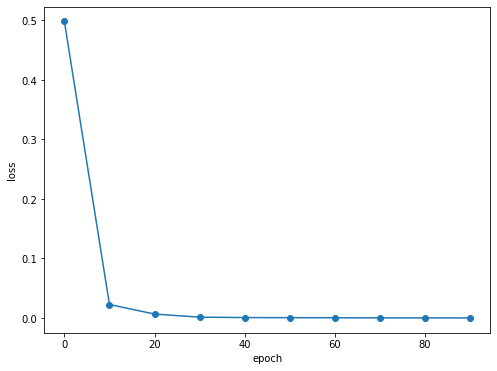

In [ ]:
# 绘制训练loss曲线

step = len(losses)
losses_x = [10*i for i in range(step)]

plt.figure(figsize=(8,6))
plt.plot(losses_x, losses,"-o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
h0=torch.zeros(1,5,10)
c0=torch.zeros(1,5,10)
preds=[]

for i,data in enumerate(test_loader):
  x,y=data
  x=x.view(-1,10,1)

  #pred=net(x,h0)#使用RNN
  #pred=net(x,(h0,c0))#使用LSTM
  pred=net(x,h0)#使用GRU
  preds.append(pred.data.numpy())

  print("true: ",y.view(1,-1).data)
  print("pred: ",pred.view(1,-1).data)

true:  tensor([[-0.2879, -0.3821, -0.4724, -0.5581, -0.6381]])
pred:  tensor([[-0.2907, -0.3833, -0.4722, -0.5566, -0.6357]])
true:  tensor([[-0.7118, -0.7784, -0.8371, -0.8876, -0.9291]])
pred:  tensor([[-0.7085, -0.7743, -0.8323, -0.8819, -0.9225]])
true:  tensor([[-0.9614, -0.9841, -0.9969, -0.9998, -0.9927]])
pred:  tensor([[-0.9541, -0.9765, -0.9896, -0.9936, -0.9884]])
true:  tensor([[-0.9756, -0.9488, -0.9126, -0.8672, -0.8132]])
pred:  tensor([[-0.9740, -0.9502, -0.9169, -0.8740, -0.8216]])
true:  tensor([[-0.7510, -0.6813, -0.6048, -0.5223, -0.4346]])
pred:  tensor([[-0.7600, -0.6895, -0.6110, -0.5256, -0.4346]])
true:  tensor([[-0.3425, -0.2470, -0.1490, -0.0495,  0.0504]])
pred:  tensor([[-0.3395, -0.2418, -0.1428, -0.0434,  0.0558]])
true:  tensor([[0.1499, 0.2478, 0.3433, 0.4354, 0.5231]])
pred:  tensor([[0.1543, 0.2513, 0.3463, 0.4381, 0.5258]])
true:  tensor([[0.6055, 0.6820, 0.7516, 0.8137, 0.8676]])
pred:  tensor([[0.6080, 0.6839, 0.7524, 0.8129, 0.8650]])
true:  tenso

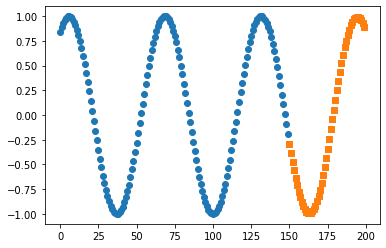

In [ ]:
plt.scatter(range(len(train_y)),train_y.data.numpy(),marker="o")
plt.scatter(range(150,200),preds,marker="s")
plt.show()

# 实验3：猫狗大战

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/ailab")
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/ailab


In [ ]:
from torchvision.models.resnet import resnet18
import os
import random
from PIL import Image
import torch.utils.data as data
import numpy as np
import torchvision.transforms as transforms
import torch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import *
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import os

处理训练集

In [ ]:
filenames = os.listdir("data/train")
categories = []
for filename in filenames:
  category = filename.split(".")[0]
  if category == "dog":
    categories.append(1)
  else:
    categories.append(0)
df = pd.DataFrame({"filename":filenames, "category":categories})

In [ ]:
df.head()

,filename,category
0,cat.9081.jpg,0
1,cat.9084.jpg,0
2,cat.9065.jpg,0
3,cat.9068.jpg,0
4,cat.912.jpg,0


In [ ]:
class DogCat(data.Dataset):
  def __init__(self, root, transform=None, train=True, val=False):
    self.val = val
    self.train = train
    self.transform = transform
    # imgs为一个储存了所有数据集绝对路径的列表
    imgs = [os.path.join(root, img) for img in os.listdir(root)]    

    if self.val:
      imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2].split('/')[-1]))
    else:
      # 根据图片的num排序，如 cat.11.jpg -> 11
      imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2]))
    imgs_num = len(imgs)
    random.shuffle(imgs) # 打乱顺序
    if self.train:
      self.imgs = imgs[:int(0.8 * imgs_num)]
    else:
      self.imgs = imgs[int(0.8 * imgs_num):]

  # 作为迭代器必须有的方法
  def __getitem__(self, index):
    img_path = self.imgs[index]
    label = 1 if 'dog' in img_path.split('/')[-1] else 0  # 狗的label设为1，猫的设为0
    data = Image.open(img_path)
    data = self.transform(data)
    return data, label

  def __len__(self):
    return len(self.imgs)

In [ ]:
# 对数据集训练集的处理
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(), # Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.2225))  # 归一化，数值是用ImageNet给出的数值
])
 
# 对数据集验证集的处理
transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [ ]:
# 生成训练集和验证集
trainset = DogCat('./data/train', transform=transform_train)
valset = DogCat('./data/train', transform=transform_val, train=False, val=True)
# 将训练集和验证集放到 DataLoader 中去，shuffle 进行打乱顺序（在多个 epoch 的情况下）
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=1)
valloader = torch.utils.data.DataLoader(valset, batch_size=100, shuffle=False, num_workers=1)

In [ ]:
net=resnet18(pretrained=True)
for param in net.parameters():
  param.requires_grad=False
features=net.fc.in_features
net.fc=nn.Linear(features,2)

device="cuda:0" if torch.cuda.is_available() else "cpu"

loss_fn=nn.CrossEntropyLoss()
opt=torch.optim.Adam(net.fc.parameters(),lr=0.001)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
device

'cuda:0'

In [ ]:
class Net(nn.Module):
  def __init__(self, model):
    super(Net, self).__init__()
    # 去掉model的最后1层
    self.resnet_layer = nn.Sequential(*list(model.children())[:-1])
    self.Linear_layer = nn.Linear(512, 2) #加上一层参数修改好的全连接层

  def forward(self, x):
    x = self.resnet_layer(x)
    x = x.view(x.size(0), -1)
    x = self.Linear_layer(x)
    return x

In [ ]:
def train(epoch):
  print('\nEpoch: %d' % epoch)
#     scheduler.step()
  model.train()
  train_acc = 0.0
  for batch_idx, (img, label) in enumerate(trainloader): 
      image = img.to(device)
      label = label.to(device)
      optimizer.zero_grad()
      out = model(image)
      loss = criterion(out, label)
      loss.backward()
      optimizer.step()
      train_acc = get_acc(out, label)
      print("Epoch:%d [%d|%d] loss:%f acc:%f" % (epoch, batch_idx, len(trainloader), loss.mean(), train_acc))

In [ ]:
def val(epoch):
  print("\nValidation Epoch: %d" % epoch)
  print(len(valloader))
  print(len(trainloader))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for batch_idx, (img, label) in enumerate(valloader):
          image = img.to(device)
          label = label.to(device)
          out = model(image)

          _, predicted = torch.max(out.data, 1)

          total += image.size(0)
          correct += predicted.data.eq(label.data).cpu().sum()
          print("Epoch:%d [%d|%d] total:%d correct:%d" % (epoch, batch_idx, len(valloader), total, correct.numpy()))
  print("Acc: %f " % ((1.0 * correct.numpy()) / total))

In [ ]:
def get_acc(output, label):
  total = output.shape[0]
  _, pred_label = output.max(1)
  num_correct = (pred_label == label).sum().item()
  return num_correct / total

In [ ]:
resnet = resnet18(pretrained=True) # 直接用 resnet 在 ImageNet 上训练好的参数
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # 若能使用cuda，则使用cuda
model = Net(resnet) # 修改全连接层
# print(model) # 打印出模型结构
model = model.to(device) # 放到 GPU 上跑
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)  # 设置训练细节
criterion = nn.CrossEntropyLoss() # 分类问题用交叉熵普遍
for epoch in range(2):
  train(epoch)
  val(epoch)
torch.save(model, 'modelcatdog.pt')  # 保存模型


Epoch: 0
Epoch:0 [0|200] loss:0.717591 acc:0.500000
Epoch:0 [1|200] loss:0.774325 acc:0.460000
Epoch:0 [2|200] loss:0.681679 acc:0.590000
Epoch:0 [3|200] loss:0.709357 acc:0.550000
Epoch:0 [4|200] loss:0.618734 acc:0.660000
Epoch:0 [5|200] loss:0.572926 acc:0.720000
Epoch:0 [6|200] loss:0.540618 acc:0.740000
Epoch:0 [7|200] loss:0.489886 acc:0.790000
Epoch:0 [8|200] loss:0.443559 acc:0.850000
Epoch:0 [9|200] loss:0.395525 acc:0.870000
Epoch:0 [10|200] loss:0.390061 acc:0.880000
Epoch:0 [11|200] loss:0.304135 acc:0.960000
Epoch:0 [12|200] loss:0.290543 acc:0.940000
Epoch:0 [13|200] loss:0.278982 acc:0.910000
Epoch:0 [14|200] loss:0.228314 acc:0.930000
Epoch:0 [15|200] loss:0.215804 acc:0.960000
Epoch:0 [16|200] loss:0.222114 acc:0.930000
Epoch:0 [17|200] loss:0.185415 acc:0.960000
Epoch:0 [18|200] loss:0.246359 acc:0.940000
Epoch:0 [19|200] loss:0.183229 acc:0.940000
Epoch:0 [20|200] loss:0.145007 acc:0.970000
Epoch:0 [21|200] loss:0.176133 acc:0.970000
Epoch:0 [22|200] loss:0.129026 a

In [ ]:
import torch
import cv2
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
# from dogcat import Net  ##重要，若没有引入这个模型代码，加载模型时会找不到模型
from torchvision import transforms
from PIL import Image

In [ ]:
classes = ('cat', 'dog')
if __name__ == '__main__':
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = torch.load('./modelcatdog.pt')  # 加载模型
  model = model.to(device)
  model.eval()  # 把模型转为test模式
  img = cv2.imread("./data/test/1.jpg")  # 读取要预测的图片
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()
  img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  trans = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
  ])

  img = trans(img)
  img = img.to(device)
  img = img.unsqueeze(0)  # 图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
  output = model(img)
  prob = F.softmax(output, dim=1)  # prob是2个分类的概率
  value, predicted = torch.max(prob, 1) # torch.max 返回最大值和最大值的索引号
  pred_class = classes[predicted.item()]
  print('predicted class is {}, probability is {}%'.format(pred_class, round(value.item(), 6) * 100))

error: ignored

# 自己找的一个lstm demo

In [ ]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flight_data.shape
(144, 3)

(144, 3)

In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
all_data = flight_data['passengers'].values.astype(float)

In [ ]:
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]
print(test_data)

[417. 391. 419. 461. 472. 535. 622. 606. 508. 461. 390. 432.]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [ ]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [ ]:
train_data_normalized.shape

torch.Size([132])

In [ ]:
train_window = 12
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq
    
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [ ]:
train_inout_seq[0]

(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
         -0.8593, -0.9341, -1.0000, -0.9385]), tensor([-0.9516]))

In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
    super().__init__()
    self.hidden_layer_size = hidden_layer_size

    self.lstm = nn.LSTM(input_size, hidden_layer_size)

    self.linear = nn.Linear(hidden_layer_size, output_size)

    self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                        torch.zeros(1,1,self.hidden_layer_size))

  def forward(self, input_seq):
    lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
    print("lstm out:",lstm_out.shape)
    print("view:",lstm_out.view(len(input_seq), -1).shape)
    predictions = self.linear(lstm_out.view(len(input_seq), -1))
    print("pred:",predictions.shape)
    return predictions[-1]


model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
epochs = 1
flag=True

for i in range(epochs):
  for seq, labels in train_inout_seq:
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1,1,model.hidden_layer_size),torch.zeros(1,1,model.hidden_layer_size))

    
    if i==0 and flag:
      print(seq.shape)
      flag=False
    y_pred = model(seq)

    single_loss = loss_function(y_pred, labels)
    single_loss.backward()
    optimizer.step()

  print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

torch.Size([12])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm out: torch.Size([12, 1, 100])
view: torch.Size([12, 100])
pred: torch.Size([12, 1])
lstm